# Klasterovanje - 3. čas

# Gaussian Mixture Models - GMMs

**GMMs** je tehnika klasterovanja koja grupiše podatke koji se sastoje iz mešavine više Gausovih distribucija. Pretpostavlja se da svaki klaster u podacima odgovara jednoj Gausovoj distribuciji tj. da je svaki klaster uzorak iz ***multivarijantne Gausove raspodele*** (*multivarijanta Gausova (normalna) raspodela predstavlja generalizaciju jednodimenzione Gausove (normalne) raspodele*). Otuda je moguće prepoznati klastere eliptičnih oblika, dok jednodimenzionom Gausovom raspodelom bi bilo moguće prepoznavati samo kružne klastere. GMMs procenjuje parametre tih distribucija kako bi identifikovao klastere i dodelio podatke ogovarajućim klasterima $=>$ **GMM uči distribuciju podataka**.



*Kako se definiše normalna raspodela u višim dimenzijama?*

Jednovarijantna normalna raspodela (jednodimenziona normalna raspodela) :

\begin{equation}
N(x,\mu,\sigma^2) = \frac{1}{\sqrt(2\pi\sigma^2)}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

U ovom slučaju postoje 2 parametra: $\mu$  i  $\sigma^2$


Multivarijantna normalna raspodela:

Pretpostavimo da postoji $n$ nezavisnih dimenzija, i svaka dimenzija prati normalnu raspodelu:

\begin{align}
                f(x_{i}) = \frac{1}{\sqrt(2\pi\sigma_{i}^2)}e^{-\frac{(x_{i}-\mu_{i})^2}{2\sigma_{i}^2}}
\end{align}

Pošto je svaka dimenzija nezavisna, zajednička funkcija gustine verovatnoće može se zapisati kao proizvod pojedinačnih funkcija gustine verovatnoće.

\begin{align}
                f(x) =\prod_{i=1}^{n}\frac{1}{\sqrt(2\pi\sigma_{i}^2)}e^{-\frac{(x_{i}-\mu_{i})^2}{2\sigma_{i}^2}}
\end{align}

\begin{align}
...
\end{align}

\begin{align}
...
\end{align}

\begin{align}
...
\end{align}

\begin{align}
f(x) = \frac{1}{\left( \sqrt{2\pi} \right)^n \cdot \sqrt{|\Sigma|}} \exp \left( -\frac{1}{2} (X - \mu) \cdot \Sigma^{-1} \cdot (X - \mu)^T \right)
\end{align}

_Kako menjanje parametara utiče na multivarijantnu Gausovu raspodelu?_

1) Obe dimenzije imaju srednju vrednost 0 i varijansu 1 $=>$ najveća gustina verovatnoće se nalazi u (0,0)

<img src="assets/gaus1.png" alt="Alt tekst" width="600" height="450"/>

2) Ukoliko povećamo varijansu jednako za obe ose, gustina verovatnoće izgleda šire

<img src="assets/gaus2.png" alt="Alt tekst" width="600" height="450"/>

3) Ukoliko promenimo srednju vrednost u jednom smeru, a varijansu ne promenimo, centar gustine verovatnoće se pomera.

<img src="assets/gaus3.png" alt="Alt tekst" width="600" height="450"/>

4) Ukoliko promenimo varijansu u jednom smeru, vidimo da je oblik gustine verovatnoće postao izdužen u smeru veće varijanse.

<img src="assets/gaus4.png" alt="Alt tekst" width="600" height="450"/>

5) Ukoliko promenimo faktor korelacije, gustina verovatnoće će odstupati od svojih osa - biće 'rotirana' u jednom smeru

<img src="assets/gaus5.png" alt="Alt tekst" width="600" height="450"/>

Ove ilustracije nam pokazuju da možemo promeniti raspodelu u smislu raširenosti, pozicije i nagiba promenom parametara:

* _srednje vrednosti_ $\mu$
* _matrice kovarijansi_ $\sum$ 

višedimenzionalne normalne distribucije.

Cilj GMMs se svodi na pronalazak ovih parametara tako da maksimizuju verovatnoću posmatranih podataka. Nasumičnim postavljanjem vrednosti ovih parametara, GMMs iterativno uči parametre metodom maksimalne verodostojnosti.

<img src="assets/gaus_iter.gif" alt="GMMs" width="400" />

# Implementacija GMMs - from scratch

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture

sns.set()

In [2]:
colors = ['#fe7c73', '#2471A3', '#5D6D7E', '#27AE60']

# Generisanje podataka za klasterovanje

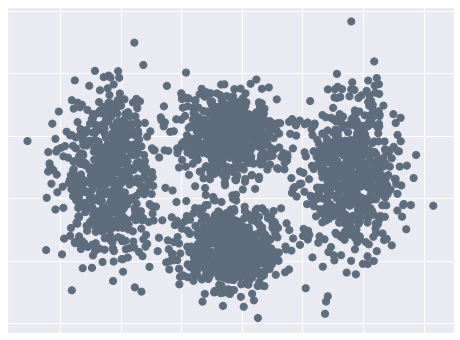

In [11]:
n_samples = 600
n_features = 2

centers = np.array([[2, 2], [7, 5], [7, -4], [12, 2]])

cov_matrices = [
    [[1, 0], [0, 12]],
    [[1, 0], [0, 3]],
    [[1, 0], [0, 3]],
    [[1, 0], [0, 12]]
]

data = []
labels = []
for i, (center, cov_matrix) in enumerate(zip(centers, cov_matrices)):
    cluster_data = np.random.multivariate_normal(center, cov_matrix, n_samples)
    data.append(cluster_data)
    labels.append(np.full(n_samples, i))

X = np.concatenate(data, axis=0)
y = np.concatenate(labels, axis=0)

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=[colors[2] for i in y], s=50)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

# KMeans

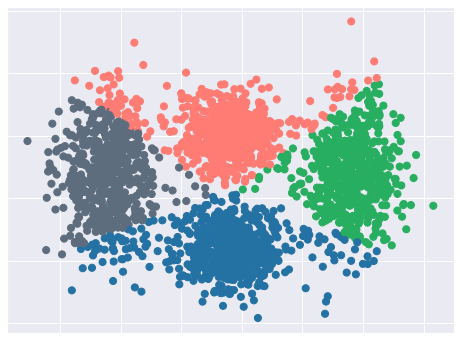

In [12]:
kmeans = KMeans(4).fit(X)

fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in kmeans.labels_], s=50)
ax.set_xticklabels([])
ax.set_yticklabels([])
plt.show()

In [13]:
def gaussian(X, mu, cov):
    n = X.shape[1]
    diff = (X - mu).T
    return np.diagonal(1 / ((2 * np.pi) ** (n / 2) * np.linalg.det(cov) ** 0.5) * np.exp(-0.5 * np.dot(np.dot(diff.T, np.linalg.inv(cov)), diff))).reshape(-1, 1)

In [14]:
def run_kmeans(X, k):
    clusters = []
    
    kmeans = KMeans(k).fit(X)
    
    mu_k = kmeans.cluster_centers_
    
    #inicijalizacija parametara za svaki klaster
    for i in range(k):
        
        param_dict = {}
        #verovatnoca svakog klastera, posto se ne zna iz koje raspodele dolaze, pretposavlja se uniformna raspodela
        param_dict['pi_k'] = 1.0 / k
        
        #srednja vrednost klastera
        param_dict['mu_k'] = mu_k[i]
        
        #matrica kovarijansi se inicijalizuje na matricu identiteta
        param_dict['cov_k'] = np.identity(X.shape[1], dtype=np.float64)
        
        clusters.append(param_dict)        
        
    return clusters

In [15]:
def run_exp_step(X, clusters):

    N = X.shape[0] 
    K = len(clusters) 
    
    #za svaku tacku cuva s kojom verovatnocom pripada svakom klasteru
    gamma_ik = np.zeros((N, K))
    
    # calculate gamma of data points over all clusters
    for k, cluster in enumerate(clusters):
    
        pi_k = cluster['pi_k']
        mu_k = cluster['mu_k']
        cov_k = cluster['cov_k']
        
        #verovatnoca klastera * verovatnoca da pripada k-tom klasteru
        gamma_ik[:, k] = (pi_k * gaussian(X, mu_k, cov_k)).ravel()
    
    #normalizacija kako bi verovatnoce za svaki klaster bile izmedju 0 i 1
    gamma_sum = np.sum(gamma_ik, 1)
    
    gamma_ik /= np.expand_dims(gamma_sum, 1)
    
    return gamma_ik, gamma_sum

In [16]:
def run_maxi_step(X, clusters, gamma_ik):
    
    N = X.shape[0] 
    
    # azuriranje parametara za svaki klaster
    for k, cluster in enumerate(clusters):
    
        # gama vrednosti tacaka za klaster k
        gamma_k = np.expand_dims(gamma_ik[:, k], 1)
        
        # suma tih gama vrednosti
        N_k = np.sum(gamma_k, axis=0)
        
        # azuriranje parametara svakog klastera
        pi_k = N_k / N
        mu_k = np.sum(gamma_k * X, axis=0) / N_k
        cov_k = (gamma_k * (X - mu_k)).T @ (X - mu_k) / N_k
        
        cluster['pi_k'] = pi_k
        cluster['mu_k'] = mu_k
        cluster['cov_k'] = cov_k
        
    return clusters

In [17]:
def find_log_likelihood(gamma_sum):
    
    return np.sum(np.log(gamma_sum))

In [18]:
def run_gmm(X, n_clusters, n_epochs):
    
    clusters = run_kmeans(X, n_clusters)

    for i in range(n_epochs):
                  
        gamma_nk, gamma_sum = run_exp_step(X, clusters)
        clusters = run_maxi_step(X, clusters, gamma_nk)
        likelihood = find_log_likelihood(gamma_sum) 
        print(f"Epoch: {i+1} --> {likelihood = }")
    
    return clusters

In [19]:
n_clusters = 4
n_epochs = 50

clusters = run_gmm(X, n_clusters, n_epochs)

Epoch: 1 --> likelihood = -16102.004497499343
Epoch: 2 --> likelihood = -12453.31856720853
Epoch: 3 --> likelihood = -12314.494713799264
Epoch: 4 --> likelihood = -12240.374053585127
Epoch: 5 --> likelihood = -12203.009594899098
Epoch: 6 --> likelihood = -12190.523152733276
Epoch: 7 --> likelihood = -12187.555153821831
Epoch: 8 --> likelihood = -12186.914358534465
Epoch: 9 --> likelihood = -12186.776482778423
Epoch: 10 --> likelihood = -12186.746593667714
Epoch: 11 --> likelihood = -12186.740075943197
Epoch: 12 --> likelihood = -12186.738649338098
Epoch: 13 --> likelihood = -12186.738336377282
Epoch: 14 --> likelihood = -12186.738267629858
Epoch: 15 --> likelihood = -12186.738252516274
Epoch: 16 --> likelihood = -12186.73824919209
Epoch: 17 --> likelihood = -12186.738248460737
Epoch: 18 --> likelihood = -12186.738248299802
Epoch: 19 --> likelihood = -12186.738248264386
Epoch: 20 --> likelihood = -12186.738248256592
Epoch: 21 --> likelihood = -12186.738248254875
Epoch: 22 --> likelihood

# Implementacija GMMS - sklearn

In [20]:
gmm = GaussianMixture(n_components=4, random_state=0)
gmm.fit(X)
labels = gmm.predict(X)

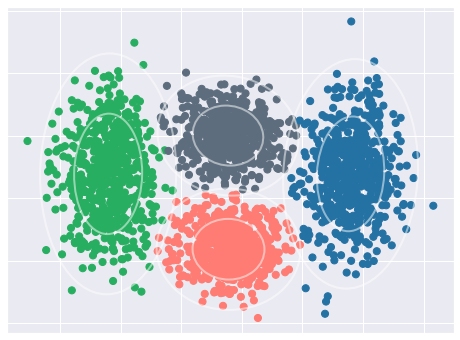

In [21]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=[colors[i] for i in labels], s=50)

for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan(u[1] / u[0])
    angle = 180.0 * angle / np.pi

    for std in range(1, 3):
        ell = Ellipse(mean, std * v[0], std * v[1], 180.0 + angle, color='gray', alpha=0.3)
        ell.set_facecolor('none')
        ell.set_edgecolor('white')
        ell.set_alpha(0.5)
        ell.set_linewidth(2)
        ax.add_artist(ell)

ax.set_xticklabels([])
ax.set_yticklabels([])       
plt.show()

In [26]:
print('\nGMMs - sklearn:\n\n', gmm.means_)
print('\nGMMs - from scratch:\n\n', np.array([cluster['mu_k'].tolist() for cluster in clusters]))


GMMs - sklearn:

 [[ 6.94943123 -4.08600752]
 [11.98236874  1.95012873]
 [ 6.92817147  5.01596517]
 [ 1.98563126  1.94985788]]

GMMs - from scratch:

 [[11.97543693  1.95044977]
 [ 6.92663989  5.01799729]
 [ 6.94956669 -4.08778019]
 [ 1.99135941  1.95125159]]


Klasteri su isti, samo drugačijeg redosleda